### LINEAR REGRESSION
In this assignment we try to model the 'Estimated Price' as a linear relation of the other elements

In [94]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CLASSES IN PYTHON
Although this might look scary to implement, go about it one function at a time.  
Using classes help with keeping track of multiple models and makes your overall code much tidier.

In [95]:

class LinearRegression:
    def __init__(self) -> None:
        '''
        Constructor for the class
        Defines member variables weights and bias and initializes them to zero
        They can be accessed in other functions of the class by using self.weights and self.bias
        '''
        self.weights: np.ndarray
        self.bias: float
    


    ### TODO 1
    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Computes the predicted values based on calculated weights and bias given an input array
        
        Args:
            X (np.ndarray): Feature matrix of shape (n_samples, n_features).
        
        Returns:
            An array of predicted values Y_pred (np.ndarray)
        '''
        Y_pred=np.dot(X,self.weights)+self.bias
        return Y_pred
    
    ### TODO 2 
    def loss(self, X: np.ndarray, y: np.ndarray, norm: int) -> tuple:
        '''
        The loss function is a variant of Minkowski distance.
        Minkowski distance between X and Y is defined as:
            (1 / n) * [sum(abs(xi - yi) ^ p)]
        Return the loss, and gradients with respect to the weights and bias
        
        Args:
            X_input (np.ndarray): Feature matrix of shape (n_samples, n_features).
            Y_expected (np.ndarray): Target vector of shape (n_samples,).
            norm (int): Order of Minkowski distance.
        
        Returns:
            tuple: loss, dw, db
        '''
        m=X.shape[0] #the number of samples
        Y_pred=self.predict(X)
        temp=Y_pred-y #the difference between predicted and estimated
        a=temp**2 
        a=a/(2*m)
        loss=np.sum(a)
        db=np.sum(temp)/m
        dw=temp@X #a faster way of calculating without loops by using matrix multiplication
        dw=dw/m
        return loss,dw,db
    
    ### TODO 3
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int = 500, learning_rate: float = 0.01, norm: int = 2, threshold: float = 0.0001) :
        '''
        Applies gradient descent on the given data and tunes the values of the weights and bias

        Args:
            X (np.ndarray): Feature matrix of shape (n_samples, n_features).
            y (np.ndarray): Target vector of shape (n_samples,).
            epochs (int): Maximum number of iterations of gradient descent.
            learning_rate (float): Constant which alters the rate of convergence
            norm (int): Norm for the loss function
            threshold (float): Stops the gradient descent if the change in loss or cost is below this value
            lambda_reg (float): Regularization constant (Apply L1 regularization)

        Returns:
            None
        '''
        n_features=X.shape[1]
        self.bias=0
        self.weights=np.random.randint(0,5,n_features)
        lr=learning_rate #I was too lazy to type the 2 words again and again
        it=self.loss(X,y,norm) #it stands for initial tuple
        for i in range(epochs):
            prevloss=it[0]
            temp_w=self.weights-lr*it[1]
            temp_b=self.bias-lr*it[2]
            self.weights=temp_w
            self.bias=temp_b
            nt=self.loss(X,y,norm)
            newloss=nt[0]
            it=nt
            if abs(newloss-prevloss)<=threshold:
                break
            i+=1
        return None


### Importing and Converting Data
Some features in a dataset are not of numerical type and are either categorical or boolean.  
To get past this, we convert the columns by using one-hot encoding.

In [96]:
# importing the data
df = pd.read_csv('linear_data.csv')
oha=pd.get_dummies(df['Manual Transmission'])
ohb=pd.get_dummies(df['Fuel'])
df=df.drop('Fuel',axis=1)
df=df.drop('Manual Transmission',axis=1)
temp=df['Estimated Price']
df=df.drop('Estimated Price',axis=1)
df=df.join(oha)
df=df.join(ohb)
df=df.join(temp)
data = df.to_numpy()
i=0
t=list()
while i<1000:
    t.append(data[i,14])
    i+=1
X,y=np.delete(data,14,1),np.array(t)

### Test-train split
Overfitting is one of the biggest problems in machine learning. Overfitting occurs when the model is trained to be very accurate on the given dataset but performs very poorly on a different but similar dataset.
To check for overfitting, we split our dataset into test and train sets and check the accuracy/loss of the model.

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Z-Score Standardization
Since some features might have much higher values than the others, for weights of similar magnitude, the model will mainly focus only on features with large values.  
To overcome this, we standardize each feature using Z-Score Standardization so that all features are treated equally

In [98]:
# z-score standardization
### TODO 5
def z_score(X: np.ndarray) -> tuple:
    '''
    The Z-Score scales data such that its mean is 0 and standard deviation is 1
    z-score for a value x in the dataset is (x - mean) / std_dev
    (z-score normalization is done over a feature and NOT an entry)
    Return the z-score value of all the elements in the set along with the mean and standard deviation of the original set
    '''
    X = np.asarray(X, dtype=np.float64)
    x_mean=np.mean(X,axis=0)
    x_std=np.std(X,axis=0)
    x=(X-x_mean)/x_std
    return x, x_mean, x_std

In [99]:
# Normalizing the data
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std

MSE loss:  4147491.6098135174


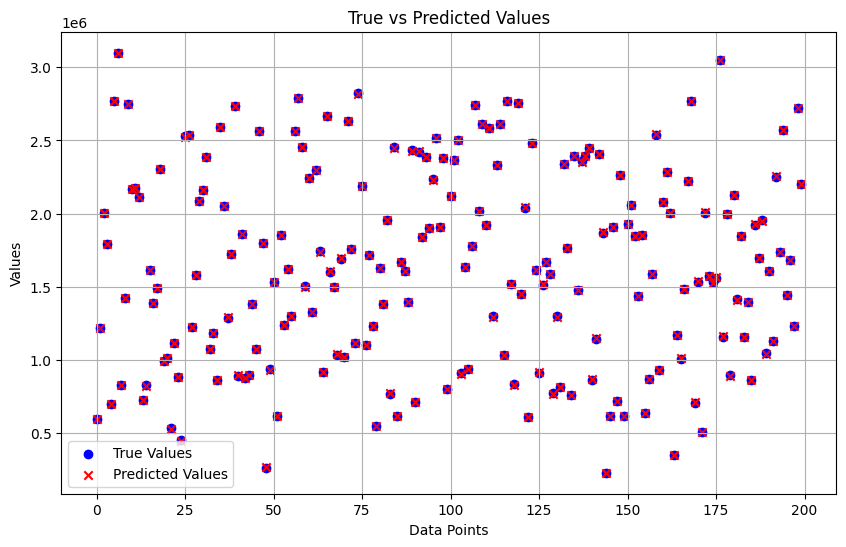

In [103]:
model = LinearRegression()
model.fit(x_train, y_train, epochs=1000, learning_rate=0.01, norm=2, threshold=0.001)
y_pred = model.predict(x_test)
print("MSE loss: ", np.mean((y_pred - y_test) ** 2))

indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.scatter(indices, y_test, label='True Values', color='blue', marker='o')
plt.scatter(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()